In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
import math
import scipy.cluster
from scipy.interpolate import make_interp_spline, BSpline
from scipy.interpolate import interp1d



In [2]:
#Definimos función para calcular energía de enlace con modelo de gota

def Ener(A,Z):
    a1 = 15.5 #MeV
    a2 = 16.8 #MeV
    a3 = 0.72 #MeV
    a4 = 23.3 #MeV
    a5 = 34.0 #MeV
    N = A-Z
    term = a5*A**(-3/4)
    
    be = -a1*A + a2*A**(2/3) + a3*(Z**2)/A**(1/3) + a4*(((N-Z)**2)/A)
    
    if (A % 2) == 0 and (Z % 2) == 0:
        return (be - term)
        
    elif (A % 2) == 1 and (Z % 2) == 1 :
        return (be + term)
        
    else:
        return (be)

In [19]:
#definimos listas par e impar las cuales serán llenadas dependiendo de el valor Z

par = []
impar = []

for i in range(53,61):
    if (i % 2 ) == 0:
        par.append(Ener(136,i))
    else:
        impar.append(Ener(136,i))
    

Text(0, 0.5, 'Binding Energy (MeV)')

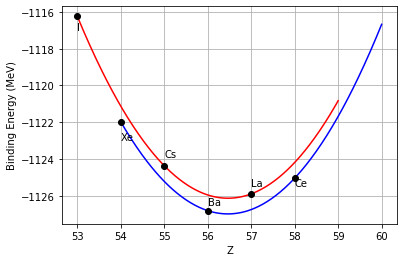

In [60]:
#graficamos 

x1 = np.array([53,55,57,59])
x2 = np.array([54,56,58,60])
y1 =  np.array(impar)
y2 = np.array(par)

x1_new = np.linspace(x1.min(), x1.max(), 300)
f = interp1d(x1, y1, kind='quadratic')
y_smooth=f(x1_new)

x2_new = np.linspace(x2.min(), x2.max(), 300)
f2 = interp1d(x2, y2, kind='quadratic')
y_smooth2=f2(x2_new)


plt.figure()
plt.plot(x2_new,y_smooth2,'b')
plt.plot(x1_new,y_smooth, 'r')
plt.xlabel("Z")
plt.plot(53,-1116.234281781660, 'ko')
plt.plot(55,-1124.369023777232, 'ko')
plt.plot(57,-1125.901348809676, 'ko')
plt.plot(54,-1121.9806931424243, 'ko')
plt.plot(56,-1126.8142266564319, 'ko')
plt.plot(58,-1125.0453432073127, 'ko')
plt.grid()
plt.annotate('I',(53,-1117))
plt.annotate('Cs',(55,-1123.9)) 
plt.annotate('La',(57,-1125.5)) 
plt.annotate('Xe',(54,-1123))
plt.annotate('Ba',(56,-1126.5)) 
plt.annotate('Ce',(58,-1125.5)) 

plt.ylabel("Binding Energy" + " " + "(MeV)")